Lasso-регрессия (L1-регуляризация)

Lasso-регрессия идёт дальше и может полностью "отключить" незначимые
признаки, установив их вес в ноль. Это делает модель проще и понятнее.

Пример: Если вы прогнозируете цену квартиры и добавили признак "цвет стен",
Lasso может определить, что он не влияет на итоговую стоимость, и полностью исключит
его из модели.

Рассмотрим пример кода с использованием Lasso-регрессии, где будет показано,
как модель может полностью исключить незначимый признак — например, "цвет стен" — и
визуализировать влияние признаков на стоимость квартиры:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# Пример данных о квартирах
data = {
"Площадь": [50, 65, 40, 80, 55, 70, 60, 45],
"Этаж": [3, 5, 2, 7, 4, 6, 3, 1],
"Возраст_дома": [10, 20, 5, 15, 12, 18, 8, 3],
"Наличие_лифта": [1, 1, 0, 1, 0, 1, 0, 0], # 1 — есть лифт, 0 — нет
"Цвет_стен": [0, 1, 0, 1, 0, 1, 0, 1], # 0 — стандартный, 1 — яркий цвет
"Цена": [5500, 6200, 4800, 7500, 5900, 7100, 6000, 4700] # Цена в тыс. руб.
}
# Создание DataFrame
df = pd.DataFrame(data)
df

,Площадь,Этаж,Возраст_дома,Наличие_лифта,Цвет_стен,Цена
0,50,3,10,1,0,5500
1,65,5,20,1,1,6200
2,40,2,5,0,0,4800
3,80,7,15,1,1,7500
4,55,4,12,0,0,5900
5,70,6,18,1,1,7100
6,60,3,8,0,0,6000
7,45,1,3,0,1,4700


In [4]:
# Признаки и целевая переменная
X = df[["Площадь", "Этаж", "Возраст_дома", "Наличие_лифта", "Цвет_стен"]]
y = df["Цена"]

In [6]:
# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Обучаем обычную линейную регрессию (для сравнения)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
# Обучаем Lasso-регрессию с регуляризацией
lasso_reg = Lasso(alpha=500) # Чем больше alpha, тем сильнее "штраф"
lasso_reg.fit(X_train, y_train)

Lasso(alpha=500)

In [8]:
# Сравнение коэффициентов признаков
coef_df = pd.DataFrame({
"Признак": X.columns,
"Линейная регрессия": lin_reg.coef_,
"Lasso-регрессия": lasso_reg.coef_
})
print(coef_df)

         Признак  Линейная регрессия  Lasso-регрессия
0        Площадь        5.200000e+01             68.0
1           Этаж        1.600000e+02              0.0
2   Возраст_дома        8.526513e-14              0.0
3  Наличие_лифта        2.000000e+01              0.0
4      Цвет_стен       -2.000000e+02             -0.0


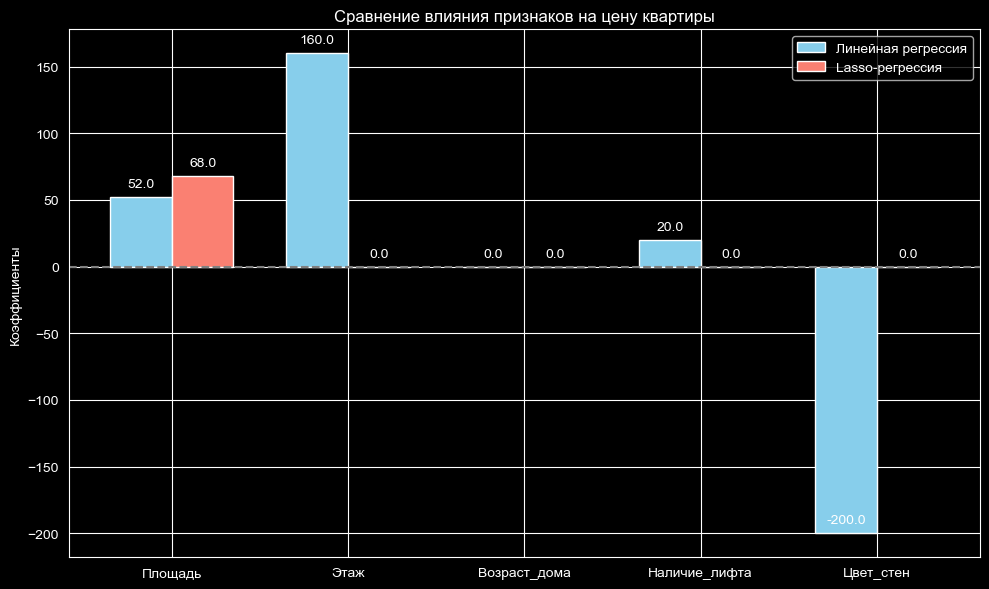

In [9]:
# ВИЗУАЛИЗАЦИЯ влияния признаков
x = np.arange(len(X.columns))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, coef_df["Линейная регрессия"], width, label='Линейная регрессия',
color='skyblue')
rects2 = ax.bar(x + width/2, coef_df["Lasso-регрессия"], width, label='Lasso-регрессия',
color='salmon')
ax.set_ylabel('Коэффициенты')
ax.set_title('Сравнение влияния признаков на цену квартиры')
ax.set_xticks(x)
ax.set_xticklabels(coef_df["Признак"])
ax.legend()
# Добавляем значения на столбцы
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

Что делает этот код:
1. Создаёт набор данных с реальными признаками (площадь, этаж и т.д.) и добавляет
"шумовой" признак — "Цвет стен", который не должен влиять на цену квартиры.
2. Обучает Lasso-регрессию с регуляризацией, которая способна обнулить незначимые
признаки.
3. Сравнивает веса признаков после обучения и показывает, какие из них модель сочла
важными.
4. Визуализирует результат, показывая, какие признаки влияют на стоимость, а какие —
исключены из расчёта.

Lasso-регрессия не просто уменьшает влияние неважных признаков, но может
полностью их обнулить, сделав модель проще и понятнее. Это особенно полезно, когда у
вас много признаков, и нужно автоматически выбрать только те, что действительно
влияют на результат.

Это полезно, когда у вас много признаков, и нужно понять, какие из них
действительно важны.

Когда использовать Ridge, а когда Lasso?
- Ridge подходит, когда все признаки имеют какое-то влияние, но их значения нужно
"сбалансировать".
- Lasso отлично работает, когда нужно "отсеять" лишние признаки и оставить только
ключевые.